For this practical work, We will develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.linspace(0,20)
y = 1 + -2*(x)

In [3]:
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)
theta = np.random.random((2,1))
theta

array([[0.33054783],
       [0.79286882]])

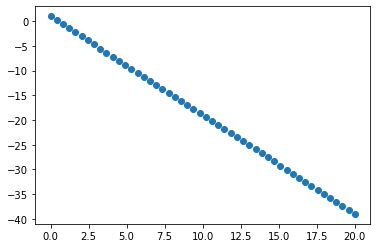

((50, 1), (50, 1))

In [4]:
plt.scatter(x,y)
plt.show()
x.shape,y.shape

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
def calc_cost(y,y_hat):
    norm = np.linalg.norm(y_hat - y)
    return (1/2*len(y))  * np.sum(np.square(norm**2))

In [6]:
def batch_gradient_descent(X, y, theta, alpha=0.001, iterations=1000):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,theta.size))
    
    for i in range(iterations):
        
        y_hat = np.dot(X,theta)
        theta = theta -(1/m)*alpha*X.T.dot((y_hat - y))
        
        theta_history[i,:] = theta.T
        cost_history[i]  = calc_cost(y,y_hat)

    return theta, cost_history, theta_history

#### Try your function with any input parameterss of your choice.

In [7]:
X = np.c_[ np.ones((len(x),1)),x]
iters = 1000
alpha = 0.0001

theta_batch, cost_history_batch, theta_history_batch = batch_gradient_descent(X,y,theta, alpha,iters)

In [8]:
y_hat_batch = theta_batch[0] + theta_batch[1] *x

#### Calculate r2 score

In [9]:
r2_score(y, y_hat_batch)

0.9986580145500272

#### Plot loss vs. epochs

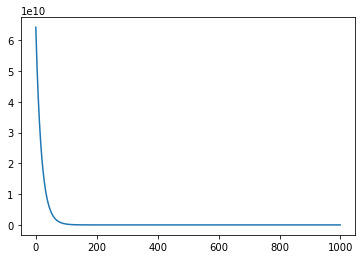

In [10]:
cost_history_batch = cost_history_batch.reshape(cost_history_batch.shape[0],1)
plt.plot(cost_history_batch)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

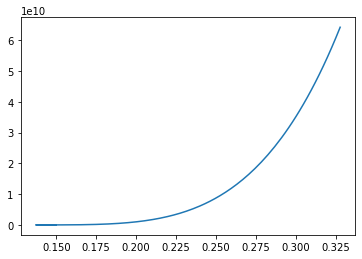

In [11]:
plt.plot(theta_history_batch[:,0], cost_history_batch)
plt.show()

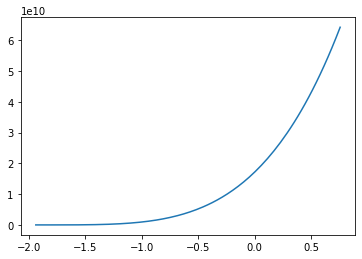

In [12]:
plt.plot(theta_history_batch[:,1], cost_history_batch)
plt.show()

#### Plot all regression lines till converge

In [13]:
y_hat_batch_hist =np.array([theta_history_batch[i,1] *x + theta_history_batch[i,0]*1 for i in range(iters)]) 

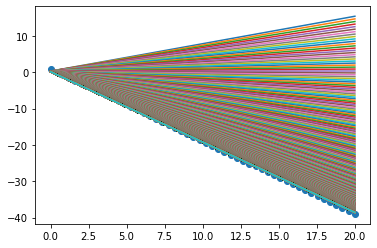

In [14]:
for line in y_hat_batch_hist:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

#### Plot the best regression line

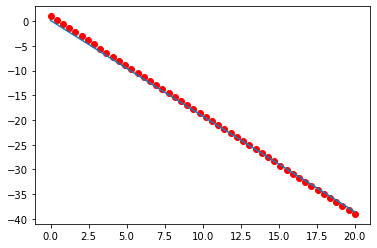

In [15]:
plt.plot(x,y_hat_batch)
plt.scatter(x,y,color= 'red')
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [16]:
def minibatch_gradient_descent (X, y, theta, alpha=0.001, iterations=1000, batch_size = 10):

    batch_num = X.shape[0] // batch_size
    cost_history = list()
    theta0_history = list()
    theta1_history = list()


    for i in range(iterations):
        #X,y = shuffle(X,y)
       
        for j in range(batch_num):
            
            chunck_x  = X[j* batch_num: j * batch_num + batch_num]
            chunck_y  = y[j* batch_num: j * batch_num + batch_num]
        
        
            y_hat = np.dot(chunck_x,theta)
            cost_history.append(calc_cost(chunck_y , y_hat))  
            

            theta = theta -(1/batch_size)*alpha*chunck_x.T.dot((y_hat - chunck_y))
            theta0_history.append(theta[0,0])
            theta1_history.append(theta[1,0])


    return theta0_history,theta1_history, cost_history

In [17]:
iters = 100
batch_size = 10
alpha = 0.001
theta0_mini,theta1_mini,cost_history_mini = minibatch_gradient_descent(X,y,theta, alpha,iters,batch_size)

In [18]:
y_hat_mini = theta0_mini[-1] + theta1_mini[-1] *x 

In [19]:
r2 = r2_score(y, y_hat_mini)
r2

0.9925124406013168

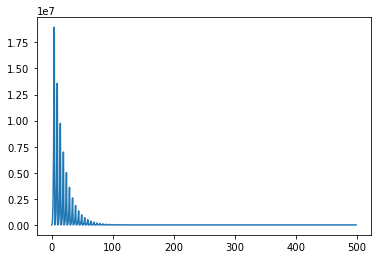

In [20]:
plt.plot(cost_history_mini)
plt.show()


In [21]:
y_hat_batch_mini =np.array([theta1_mini[i] *x + theta0_mini[i]*1 for i in range(iters*X.shape[0] // batch_size)]) 

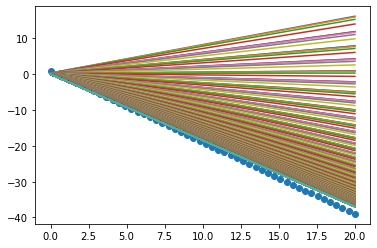

In [22]:
for line in y_hat_batch_mini:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

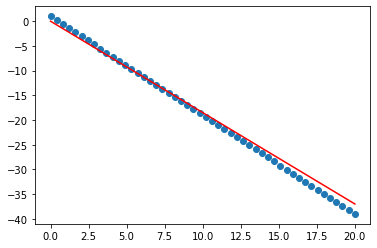

In [23]:
plt.plot(x,y_hat_mini,color = 'red')
plt.scatter(x,y)
plt.show()

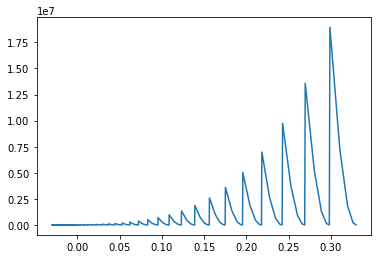

500

In [24]:
plt.plot(theta0_mini, cost_history_mini)
plt.show()
len(theta0_mini)

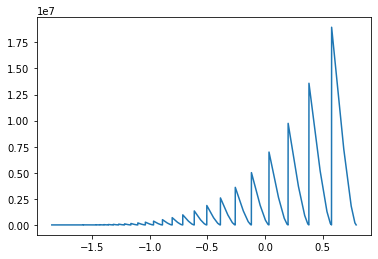

In [25]:
plt.plot(theta1_mini, cost_history_mini)
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [26]:
def stochstic_gradient_descent(X, y, theta, alpha=0.001, iterations=1000):
    
    m = len(y)
    cost_history = list()
    theta0_history = list()
    theta1_history = list()
    theta_history = np.zeros((2,1))
    
    X,y = shuffle(X,y)
    for i in range(iterations):
        for index in range(X.shape[0]):
            rand_x = X[ index]
            rand_y = y[ index]

            y_hat = np.dot(rand_x,theta)
            cost_history.append(calc_cost(rand_y,y_hat)) 

            
            theta0_history.append(theta[0,0])
            theta1_history.append(theta[1,0])
            theta = theta - alpha* rand_x[0]*(y_hat - rand_y)
            
        

    return theta0_history,theta1_history, cost_history

In [27]:
iters = 100
alpha = 0.001
theta0_st,theta1_st,cost_history_st = stochstic_gradient_descent(X,y,theta, alpha,iters)

In [28]:
y_hat_st = theta0_st[-1] + theta1_st[-1] *x 

In [29]:
r2 = r2_score(y, y_hat_mini)
r2

0.9925124406013168

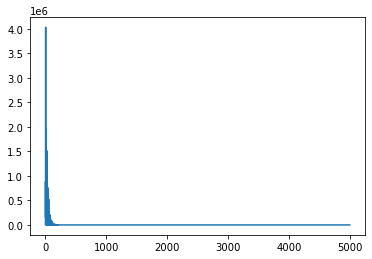

In [30]:
plt.plot(cost_history_st)

In [31]:
y_hat_batch_st =np.array([theta1_st[i] *x + theta0_st[i]*1 for i in range(iters*X.shape[0] )]) 

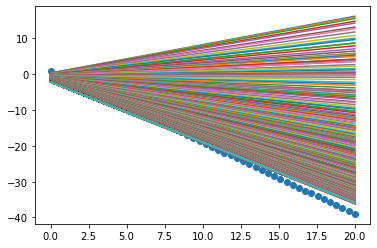

In [32]:
for line in y_hat_batch_st:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

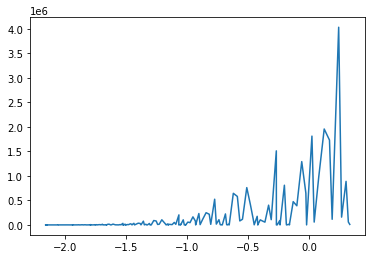

In [33]:
plt.plot(theta0_st, cost_history_st)
plt.show()

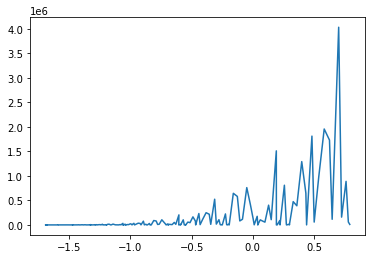

In [34]:
plt.plot(theta1_st, cost_history_st)
plt.show()